In [1]:
import random, numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import os


## Loading class module

In [2]:
%run ../stochastic_fractal_m.py

In [3]:
alphap = 2  # any real positive value larger than 0.5, but anaylytical plot exists only for alpha=1,2,3
probp = 0.75 # any value between 0 and 1

ensemble_sizep = 4_000
min_iterationp = 100_000
bin_sizep = 0.0001

# bin_sizep = 1e-7 # for alpha=1

In [4]:
expon = 2 * alphap - 1

In [5]:
header={
    'p':0.75,
    'alpha':alphap,
    'beta':alphap-1,
    'ensemble_size':ensemble_sizep,
    'min_iterationp':min_iterationp,
    'bin_sizep':bin_sizep,
    'expon':expon,    
}

## Defining directory

In [6]:
dir_data = "../data/alpha{}/".format(alphap)
dir_fig  ="../figures/alpha{}/".format(alphap)


## While testing
dir_data = "../data/temp/alpha{}/".format(alphap)
dir_fig  ="../figures/temp/alpha{}/".format(alphap)

# create directory if it does not exists
for dir_name in [dir_data, dir_fig]:
    if not os.path.isdir(dir_name):
        os.mkdir(dir_name)
        print("directory ", dir_name, " is created")
    else:
        print("directory ", dir_name, " exists")

directory  ../data/temp/alpha2/  exists
directory  ../figures/temp/alpha2/  exists


In [7]:
figure_name_collapse = dir_fig + "pn_data_coll_alpha_{}.pdf".format(alphap)
figure_name = dir_fig + "pn_alpha_{}.pdf".format(alphap)

## Simulation using class

In [8]:
stochastic_frag = TrueLengths(alpha=alphap, probability=probp)

kwargs  {'alpha': 2, 'probability': 0.75}
Turning on logging


In [9]:
# total_iteration = 10000
# lengths_enselbme = stochastic_frag.run_ensemble(ensemble_sizep, total_iteration)

In [10]:
ana_soln = AnalyticSoln()

## Other functions

In [11]:
def bin_maker(max_value, bin_number):
    bin_size = max_value/bin_number
    bins = [0.]
    for i in range(bin_number):
        bin_edge = (i+1)*bin_size
        bins.append(bin_edge)
        pass
    return bins

In [12]:
def histrogram_data(data, bin_size = bin_sizep):
    bin_number = int((np.max(data) - np.min(data))//bin_size) + 1
    y, x = np.histogram(data, bins = bin_number)
    return x[1:], y

## fitting data

$\phi \equiv \text{simulation}$
$\phi^{(th)} \equiv \text{theoritical or analytical}$

$$cost = \sum_t \sum_i (b*\phi_{i t} - \phi_{i t}^{(th)})^2 \$$

we need to minimize $cost$. We get the value of $b$ as

$$b = \frac{\sum_t \sum_i \phi_{i t} \phi_{i t}^{(th)}}{\sum_t \sum_i \phi_{i t}^2}$$

In [13]:
def fitting_parameter(given_array,ref_array):
    a1 = np.multiply(given_array,ref_array)
    a2 = np.multiply(given_array,given_array)
    a1_sum = np.sum(a1)
    a2_sum = np.sum(a2)
    return a1_sum, a2_sum

## Simulation  and plot

In [14]:
def plot_data_simulation(total_iteration, ens_data, bin_size=bin_sizep):
    """
    data collapse points from simulation
    """
    df = ana_soln.find_df(alphap,probp)
#     ens_data = stochastic_frag.run_ensemble(ensemble_sizep, total_iteration)  # from class
    x,y = histrogram_data(ens_data, bin_size)
    xi = x*total_iteration**(1/(2*alphap-1))
    phi = y/(total_iteration**((1+df)/(2*alphap-1)))

    return xi, phi 

In [15]:
def plot_data_fitted(total_iteration, ens_data, bin_size=bin_sizep):
    xi, phi  = plot_data_simulation(total_iteration, ens_data, bin_sizep)
    xi, phi_analytic = ana_soln.phi_list(alphap,probp,xi)
    a1_sum, a2_sum = fitting_parameter(phi,phi_analytic)
    return xi, phi, a1_sum, a2_sum

In [16]:
# def plot_data(total_iteration):
#     df = ana_soln.find_df(alphap,probp)
    
#     # doing the simulation here
#     ens_data = stochastic_frag.run_ensemble(ensemble_sizep, total_iteration)  # from class
#     x,y = histrogram_data(ens_data)
#     xi = x*total_iteration**(1/(2*alphap-1))
#     phi = y/(total_iteration**((1+df)/(2*alphap-1)))
#     xi, phi_analytic = ana_soln.phi_list(alphap,probp,xi)  # from class
# #     print(len(phi_analytic))
#     a1_sum, a2_sum = fitting_parameter(phi, phi_analytic)
#     print(a1_sum, ", ", a2_sum)
#     return xi, phi, a1_sum, a2_sum

## Simulation

In [17]:
import datetime
def get_time_stamp():
    now = datetime.datetime.now()
    return now.strftime("%Y%m%d_%H%M%S")

In [18]:
ens_data_dct = dict()
# for i in range(3):
#     time_t = min_iterationp*(i+1)
#     ens_data_dct[time_t] = stochastic_frag.run_ensemble(ensemble_sizep, time_t)  # from class
#     print(time_t)

In [19]:
time_t = min_iterationp*1
ens_data_dct[time_t] = stochastic_frag.run_ensemble_parallel(ensemble_sizep, time_t, 16)  # from class
# print(time_t)

filename = "alpha_{}_p_75_true_lengths_t_{}_{}.txt".format(alphap, time_t, get_time_stamp())
print(filename)
header['time_t'] = time_t
# np.savetxt(filename, ens_data_dct[time_t], header=json.dumps(header))



thread_counts  16
Total time spent  7.378773927688599  sec
Total time spent  7.3763298988342285  sec
Total time spent  7.387670993804932  sec
Total time spent  7.456848382949829  sec
Total time spent  7.433809995651245  sec
Total time spent  7.435074090957642  sec
Total time spent  7.486249923706055  sec
Total time spent  7.523099899291992  sec
Total time spent  10.548520803451538  sec
Total time spent  10.578853130340576  sec
Total time spent  10.571157217025757Total time spent    sec10.585011720657349
  sec
Total time spent  10.626067638397217  sec
Total time spent  10.587562561035156  sec
Total time spent  10.609337329864502  sec
Total time spent  10.704707384109497  sec
alpha_2_p_75_true_lengths_t_100000_20220301_145529.txt


In [20]:
time_t = min_iterationp*2
ens_data_dct[time_t] = stochastic_frag.run_ensemble_parallel(ensemble_sizep, time_t, 16)  # from class
# print(time_t)

filename = "alpha_{}_p_75_true_lengths_t_{}_{}.txt".format(alphap, time_t, get_time_stamp())
print(filename)
header['time_t'] = time_t
# np.savetxt(filename, ens_data_dct[time_t], header=json.dumps(header))


thread_counts  16
Total time spent  14.87503170967102  sec
Total time spent  14.913857698440552  sec
Total time spent  14.921732902526855  sec
Total time spent  14.91776704788208  sec
Total time spent  14.97036862373352  sec
Total time spent  15.001772403717041  sec
Total time spent  15.001957893371582  sec
Total time spent  15.232671737670898  sec
Total time spent  21.342464923858643  sec
Total time spent  21.331114292144775  sec
Total time spent  21.36125135421753  sec
Total time spent  21.35114550590515  sec
Total time spent  21.361081838607788  sec
Total time spent  21.37157130241394  sec
Total time spent  21.404385805130005  sec
Total time spent  21.477799892425537  sec
alpha_2_p_75_true_lengths_t_200000_20220301_145551.txt


In [21]:
time_t = min_iterationp*3
ens_data_dct[time_t] = stochastic_frag.run_ensemble_parallel(ensemble_sizep, time_t, 16)  # from class
# print(time_t)

filename = "alpha_{}_p_75_true_lengths_t_{}_{}.txt".format(alphap, time_t, get_time_stamp())
print(filename)
header['time_t'] = time_t
# np.savetxt(filename, ens_data_dct[time_t], header=json.dumps(header))


thread_counts  16
Total time spent  22.231701850891113  sec
Total time spent  22.325678825378418  sec
Total time spent  22.366154670715332  sec
Total time spent  22.38413977622986  sec
Total time spent  22.500184535980225  sec
Total time spent  22.515551328659058  sec
Total time spent  22.638692378997803  sec
Total time spent  26.98066234588623  sec
Total time spent  27.87317204475403  sec
Total time spent  31.916841983795166  sec
Total time spent  31.97121024131775  sec
Total time spent  31.993345022201538  sec
Total time spent  32.046825885772705  sec
Total time spent  32.05787754058838  sec
Total time spent  32.17471385002136  sec
Total time spent  32.180118560791016  sec
alpha_2_p_75_true_lengths_t_300000_20220301_145623.txt


In [22]:
# ens_data_dct[time_t]

# Read from file
if you need to generate data for large ensemble that takes a long time, you can generate multiple files for small ensembles using the previous cells and then use the following cell to read those multiple files to combine the data

In [23]:
# import glob
# files = glob.glob("alpha_{}_p_75_true_lengths_t*.txt".format(alphap))
# # print(files)
# ens_data_dct = dict()
# for file in files:
#     with open(file) as f:
#         line = f.readline()
#         head = json.loads(line[1:])
#         print(head)
#         time_t = head["time_t"] 
#         ensemble_size = head["ensemble_size"]
#         pass
#     if ensemble_size < 2000:
#         continue
#     newdata = np.loadtxt(file)
#     if time_t in ens_data_dct.keys():
#         np.append(ens_data_dct[time_t], newdata)
#     else:
#         ens_data_dct[time_t]=newdata
#     pass

In [25]:
# files

In [26]:
data_dict = {}
a1_sum, a2_sum = 0,0
for time_t in ens_data_dct.keys():
   
    if alphap in [1,2,3]:
        print("alpha is within known values")
        xi, phi, a1, a2 = plot_data_fitted(time_t, ens_data_dct[time_t], bin_sizep)
    else:
        xi, phi = plot_data_simulation(time_t,  ens_data_dct[time_t], bin_sizep)
        a1, a2 = 1, 1
        pass
    data_dict[time_t]=[xi,phi]
    a1_sum += a1
    a2_sum += a2
    
for i in range(3):
    time_t = min_iterationp*(i+1)
    data_dict[time_t][1]*=(a1_sum/a2_sum)

alpha is within known values
alpha is within known values
alpha is within known values


In [27]:
# print(data_dict.keys())
# print(a1_sum)
# print(a2_sum)

### Saving data for later use

In [28]:
signature = 'data_collapse_alpha_{}_t_{}k'
for time_t in data_dict.keys():
    x,y = data_dict[time_t]
    file_name = signature.format(alphap, int(time_t//1000))
#     np.savetxt(dir_data+file_name,np.c_[x,y])

## Plotting

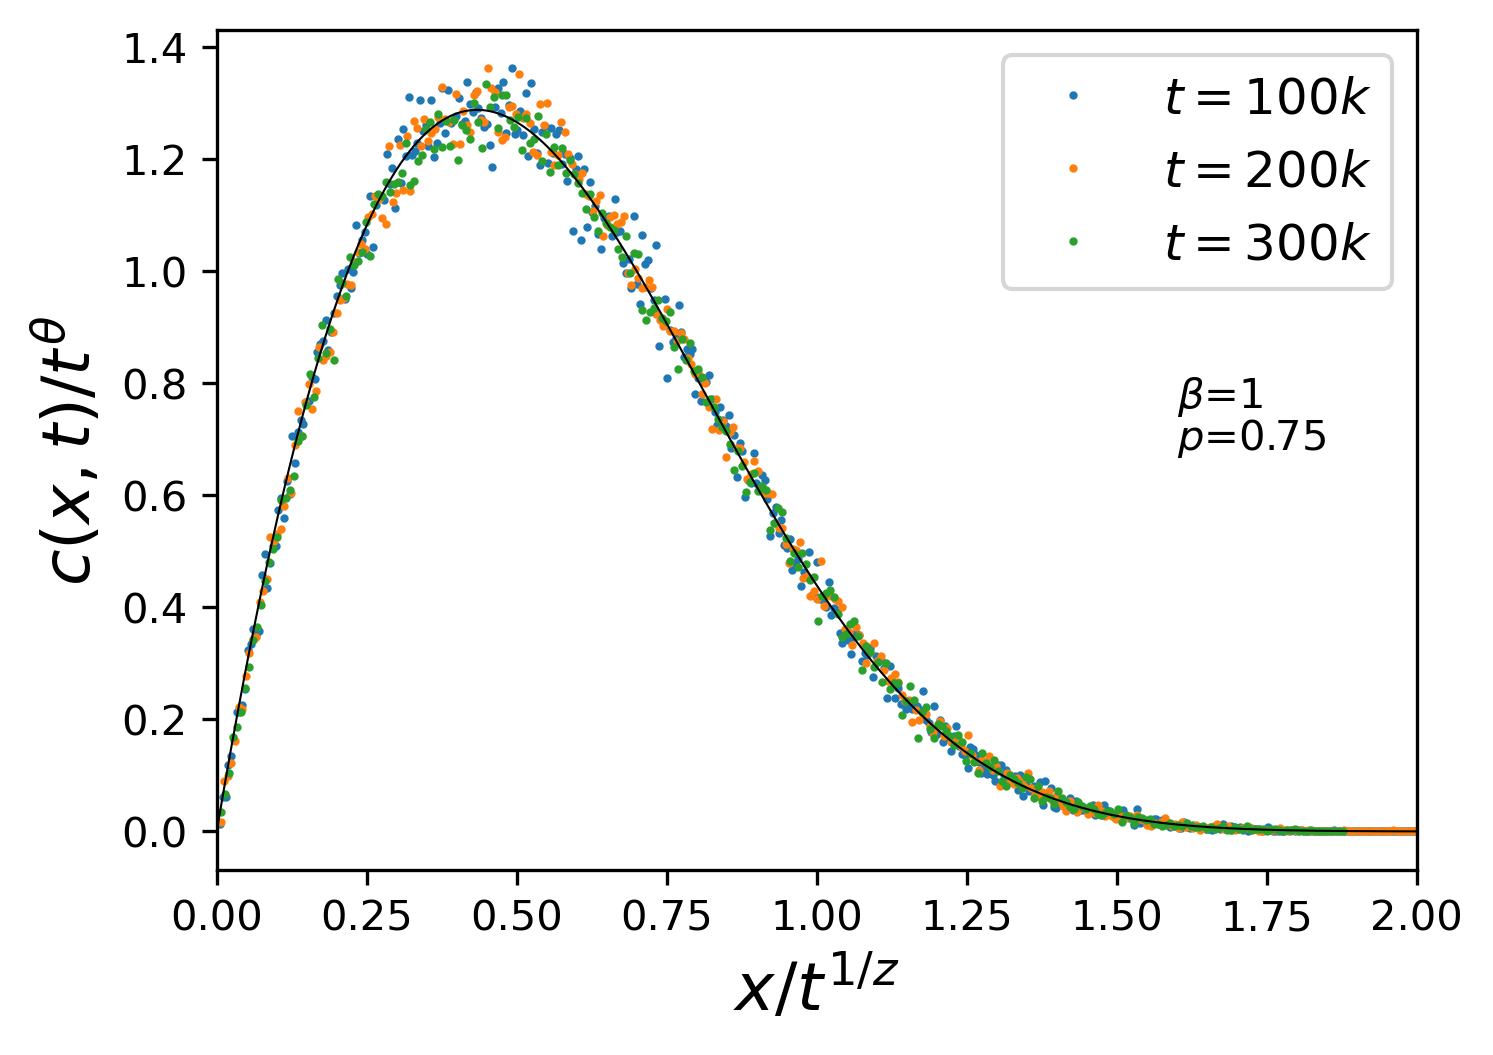

In [30]:
fig, axes = plt.subplots(1,1,figsize = (5,3.5),dpi = 300)
x_max = 2.0
for i in range(3):
    time_t = min_iterationp*(i+1)
    x,y = data_dict[time_t]
    plt.plot(x, y,"o", markersize=1,label=r"$t={}k$".format(str(int(time_t//1000))))

if alphap in [1,2,3]:
    xi_th = np.linspace(0,x_max,1000)
    xis, phi_th = ana_soln.phi_list(alphap,probp,xi_th)  # from class
    plt.plot(xi_th, phi_th,color='black',linewidth=0.5)

plt.legend(loc=1, prop={'size': 12})
plt.xlabel(r"$x/t^{1/z}$",  fontsize=16)
plt.ylabel(r"$c(x,t)/t^\theta$",  fontsize=16)
plt.xlim([0, x_max])
plt.text(0.8, 0.55, r"$\beta$={}".format(alphap-1), transform = axes.transAxes)
plt.text(0.8, 0.5, r"$p$={}".format(probp), transform = axes.transAxes)

axes.set_position([0.15, 0.15, 0.8, 0.8])

# print(figure_name_collapse)
# plt.savefig(figure_name_collapse)
# print(figure_name_collapse.split("pdf")[0]+"eps")
# plt.savefig(figure_name_collapse.split("pdf")[0]+"eps")

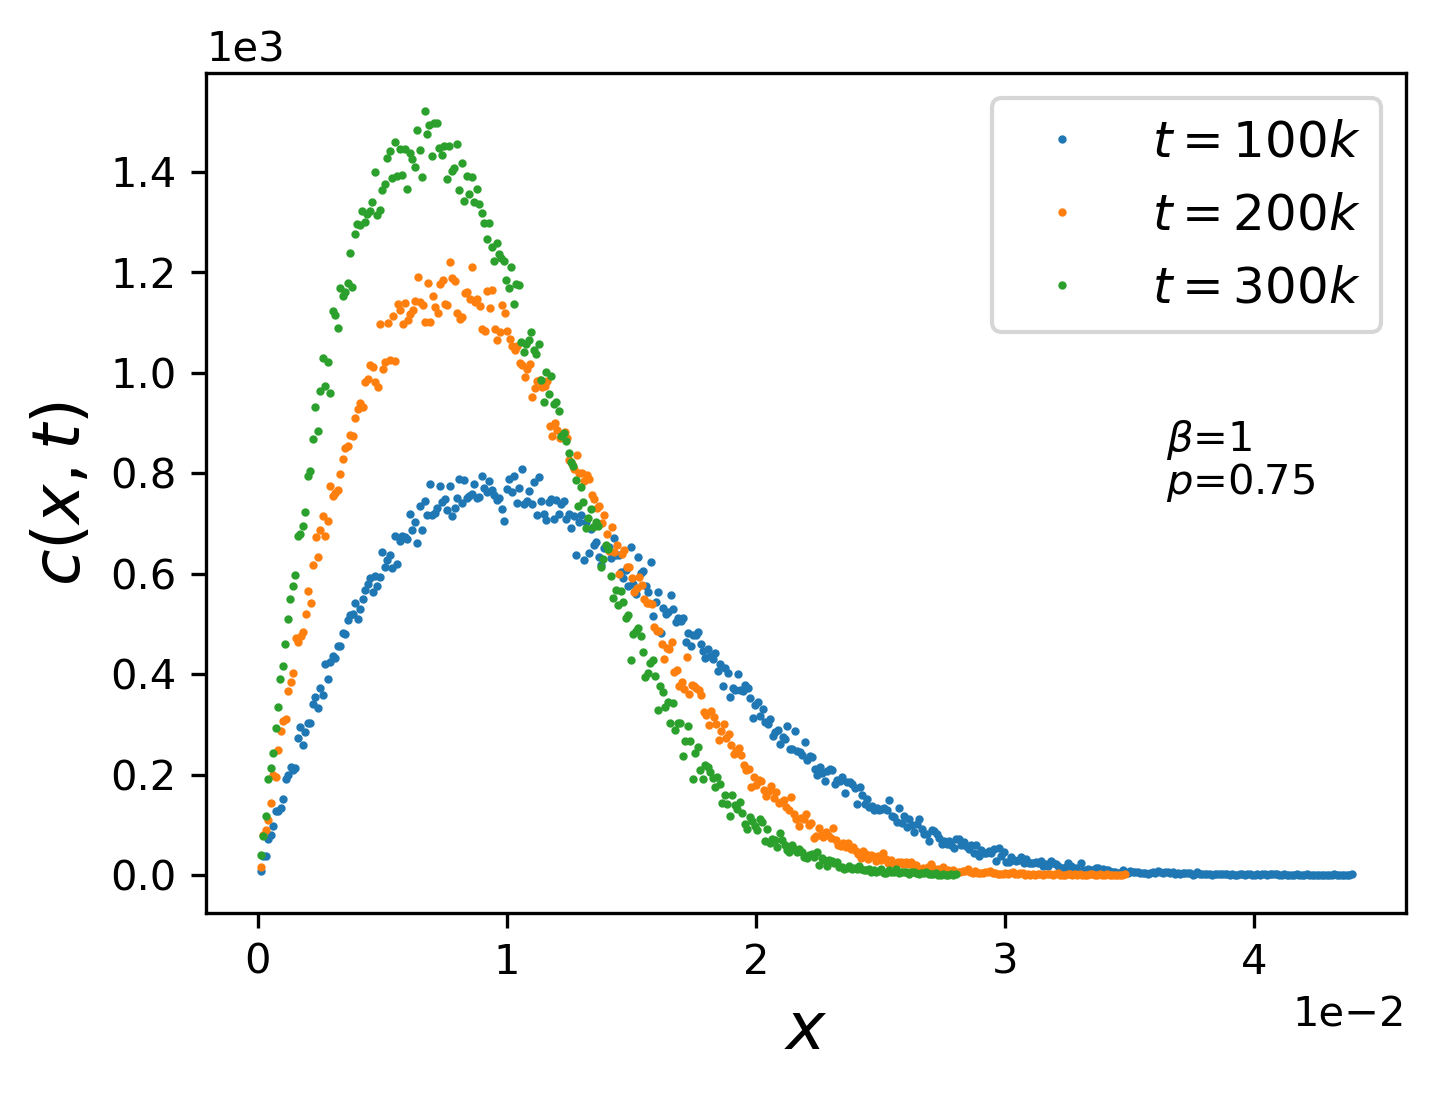

In [31]:
fig, axes = plt.subplots(1,1,figsize = (5,3.5),dpi = 300)

for i in range(3):
    time_t = min_iterationp*(i+1)
    x,y = histrogram_data(ens_data_dct[time_t])
    plt.plot(x, y,"o", markersize=1,label=r"$t={}k$".format(str(int(time_t//1000))))


plt.legend(loc=1, prop={'size': 12})
plt.xlabel(r"$x$", fontsize=16)
plt.ylabel(r"$c(x,t)$", fontsize=16)
plt.text(0.8, 0.55, r"$\beta$={}".format(alphap-1), transform = axes.transAxes)
plt.text(0.8, 0.5, r"$p$={}".format(probp), transform = axes.transAxes)
# plt.xlim([0, 1e-4])
axes.set_position([0.15, 0.15, 0.8, 0.8])
plt.ticklabel_format(axis="both", style="sci", scilimits=(0,0))

# print(figure_name)
# plt.savefig(figure_name)

# print(figure_name.split("pdf")[0]+"eps")
# plt.savefig(figure_name.split("pdf")[0]+"eps")